#### Link :- https://www.kaggle.com/code/narottamsharma/pothole

In [1]:
!nvidia-smi

Tue Mar 18 07:11:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 18.7 MB/s eta 0:00:00a 0:00:01


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.92 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.0/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
import torch
torch.cuda.empty_cache()

In [6]:
model = YOLO("yolo11n.pt")


train_results = model.train(
    data="/kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/data.yaml",
    epochs=100,
    imgsz=640,               # Keep it at 640 if it works; reduce if OOM
    device=0,                # Use GPU
    batch=4,                 # Lower batch size if OOM persists
    workers=0,               # Fewer workers = lower memory load
    half=True,               # Mixed precision training
    lr0=0.01,                
    lrf=0.1,                 
    weight_decay=0.0005,     
    patience=20,             
    augment=False            # No real-time augmentation
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.3MB/s]


Ultralytics 8.3.92 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/data.yaml, epochs=100, time=None, patience=20, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=0, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/train/labels... 1172 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1172/1172 [00:04<00:00, 260.45it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/valid/labels... 159 images, 1 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<00:00, 269.38it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.738G      1.883      2.468      1.589         12        640: 100%|██████████| 293/293 [00:45<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.10it/s]


                   all        159        653      0.428      0.403      0.341       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.836G      1.945      2.127      1.637         43        640: 100%|██████████| 293/293 [00:41<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.33it/s]

                   all        159        653      0.551      0.352      0.392      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.836G      1.916      1.948      1.611         29        640: 100%|██████████| 293/293 [00:41<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.43it/s]

                   all        159        653      0.537      0.432      0.454      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.836G      1.905      1.908      1.618         28        640: 100%|██████████| 293/293 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.34it/s]

                   all        159        653      0.607      0.427      0.504      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.836G      1.866      1.815      1.588         17        640: 100%|██████████| 293/293 [00:41<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.29it/s]

                   all        159        653      0.577      0.478      0.512      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.836G      1.849      1.756      1.551          9        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.58it/s]

                   all        159        653      0.565      0.508      0.528      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.836G      1.851      1.687      1.536         17        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.29it/s]

                   all        159        653      0.599       0.55      0.563      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.836G      1.813      1.661      1.519         22        640: 100%|██████████| 293/293 [00:42<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.48it/s]

                   all        159        653      0.649      0.538        0.6      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.836G      1.781      1.626      1.518         14        640: 100%|██████████| 293/293 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.77it/s]

                   all        159        653      0.617       0.57       0.59      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.836G      1.786      1.593      1.502         36        640: 100%|██████████| 293/293 [00:42<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.82it/s]

                   all        159        653       0.59      0.534      0.592      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.836G      1.763      1.557      1.481         21        640: 100%|██████████| 293/293 [00:42<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.30it/s]

                   all        159        653      0.659      0.582      0.638       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.836G      1.747      1.525      1.486         30        640: 100%|██████████| 293/293 [00:42<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.78it/s]

                   all        159        653      0.631       0.57      0.625      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.836G      1.754      1.515      1.472         26        640: 100%|██████████| 293/293 [00:42<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.56it/s]

                   all        159        653      0.699      0.553      0.643       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.836G       1.71       1.48       1.45         21        640: 100%|██████████| 293/293 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.47it/s]

                   all        159        653      0.658      0.577      0.648      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.836G      1.698      1.488      1.458         29        640: 100%|██████████| 293/293 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.82it/s]

                   all        159        653       0.66      0.538      0.614      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.836G      1.682       1.42      1.435         17        640: 100%|██████████| 293/293 [00:41<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.47it/s]

                   all        159        653      0.671      0.576      0.652      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.836G      1.686      1.417      1.429         10        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.90it/s]

                   all        159        653      0.686      0.589      0.663      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.836G      1.681      1.392      1.432         35        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.73it/s]

                   all        159        653      0.684      0.604      0.674      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.836G      1.661      1.368      1.406         25        640: 100%|██████████| 293/293 [00:41<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.41it/s]

                   all        159        653      0.685      0.575      0.669      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.836G      1.661      1.371      1.407         11        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.45it/s]

                   all        159        653      0.722      0.588      0.677      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.836G      1.643      1.336      1.398         31        640: 100%|██████████| 293/293 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.68it/s]

                   all        159        653      0.659      0.637       0.69      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.836G      1.643      1.341      1.394         10        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.99it/s]

                   all        159        653       0.75      0.593      0.698      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.836G      1.659       1.33      1.398         44        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        159        653      0.696      0.587      0.686      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.836G      1.634      1.308      1.387         36        640: 100%|██████████| 293/293 [00:41<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.89it/s]

                   all        159        653      0.735      0.603      0.685      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.836G      1.645      1.311      1.405         45        640: 100%|██████████| 293/293 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.51it/s]

                   all        159        653      0.724       0.59      0.691      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.879G      1.625        1.3      1.386         26        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.45it/s]

                   all        159        653      0.728      0.588      0.681      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.879G      1.581      1.284       1.36         18        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.72it/s]

                   all        159        653      0.725      0.614        0.7      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.879G      1.592      1.255      1.362         46        640: 100%|██████████| 293/293 [00:41<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.45it/s]

                   all        159        653      0.686      0.653      0.704      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.879G      1.575      1.255      1.371         40        640: 100%|██████████| 293/293 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.47it/s]

                   all        159        653      0.758      0.616      0.714      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.879G      1.587      1.268      1.367         42        640: 100%|██████████| 293/293 [00:41<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.32it/s]

                   all        159        653      0.743      0.617      0.714      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.879G      1.588      1.224      1.365         11        640: 100%|██████████| 293/293 [00:41<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.62it/s]

                   all        159        653        0.7      0.648      0.716      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.879G      1.566      1.235      1.361         41        640: 100%|██████████| 293/293 [00:41<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.93it/s]

                   all        159        653      0.684      0.643      0.693      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.879G      1.582      1.234      1.359         18        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.72it/s]

                   all        159        653      0.743       0.64      0.706      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.879G       1.55      1.193      1.336         11        640: 100%|██████████| 293/293 [00:41<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.32it/s]

                   all        159        653      0.737      0.629      0.705      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.879G      1.519      1.192      1.314         13        640: 100%|██████████| 293/293 [00:41<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.52it/s]

                   all        159        653      0.719      0.644      0.713      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.879G      1.546      1.179      1.334         44        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.07it/s]

                   all        159        653      0.738      0.644      0.709      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.879G      1.555      1.205      1.341         32        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.45it/s]

                   all        159        653      0.754      0.652      0.723       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.879G       1.53      1.156      1.329         31        640: 100%|██████████| 293/293 [00:41<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.36it/s]

                   all        159        653      0.738      0.631      0.707      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.879G      1.521      1.169      1.336         17        640: 100%|██████████| 293/293 [00:41<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.38it/s]

                   all        159        653      0.757      0.603      0.715      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.879G      1.512      1.147      1.318         25        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.54it/s]

                   all        159        653      0.749      0.626      0.722      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.879G      1.503      1.129      1.308         12        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.38it/s]

                   all        159        653      0.754       0.64      0.731       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.879G      1.519      1.127      1.315         18        640: 100%|██████████| 293/293 [00:42<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.20it/s]

                   all        159        653      0.729      0.672      0.739      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.879G      1.481      1.118      1.304         18        640: 100%|██████████| 293/293 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        159        653      0.736      0.634      0.718      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.879G      1.472      1.102      1.294         12        640: 100%|██████████| 293/293 [00:41<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.70it/s]

                   all        159        653      0.722      0.655      0.732      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.879G       1.48      1.102      1.287         10        640: 100%|██████████| 293/293 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.61it/s]

                   all        159        653      0.774       0.64      0.741      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.879G       1.49      1.095      1.297         39        640: 100%|██████████| 293/293 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.69it/s]

                   all        159        653      0.742      0.685      0.754      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.879G      1.492      1.095      1.307         11        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.76it/s]

                   all        159        653      0.778       0.64      0.736      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.879G      1.439       1.06      1.266         27        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.69it/s]

                   all        159        653      0.757      0.668      0.738      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.879G      1.466       1.05      1.281         50        640: 100%|██████████| 293/293 [00:41<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.38it/s]

                   all        159        653      0.782      0.652      0.745      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.879G      1.452      1.057      1.276         32        640: 100%|██████████| 293/293 [00:41<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.78it/s]

                   all        159        653      0.742      0.694      0.753      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.879G      1.465      1.066      1.282         22        640: 100%|██████████| 293/293 [00:41<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.72it/s]

                   all        159        653      0.758      0.675      0.747      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.879G      1.423      1.048      1.266         19        640: 100%|██████████| 293/293 [00:41<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.34it/s]

                   all        159        653      0.775      0.658      0.738      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.879G      1.444      1.067      1.277          7        640: 100%|██████████| 293/293 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.49it/s]

                   all        159        653      0.728      0.709      0.744      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.879G      1.434      1.039      1.261         34        640: 100%|██████████| 293/293 [00:41<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.69it/s]

                   all        159        653      0.748      0.683      0.755      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.879G      1.425      1.042      1.257         31        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.72it/s]

                   all        159        653      0.725      0.712       0.74      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.879G      1.433      1.034      1.259         38        640: 100%|██████████| 293/293 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        159        653      0.772      0.642      0.731      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.879G      1.415      1.011       1.25         30        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.21it/s]

                   all        159        653      0.716      0.695      0.736      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.879G      1.414      1.019      1.255         30        640: 100%|██████████| 293/293 [00:44<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.66it/s]

                   all        159        653      0.758      0.663      0.738      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.879G      1.394     0.9915      1.239         11        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.25it/s]

                   all        159        653      0.724      0.689      0.724      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.879G      1.409     0.9896      1.238         14        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.25it/s]

                   all        159        653      0.739      0.689      0.746      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.879G      1.386     0.9814       1.23         29        640: 100%|██████████| 293/293 [00:41<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.78it/s]

                   all        159        653      0.781      0.675      0.755      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.879G      1.377     0.9714      1.228         20        640: 100%|██████████| 293/293 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.56it/s]

                   all        159        653       0.77      0.667      0.738      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.879G      1.387     0.9677      1.228         26        640: 100%|██████████| 293/293 [00:41<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.62it/s]

                   all        159        653      0.791       0.66      0.751       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.879G      1.394     0.9724      1.231         26        640: 100%|██████████| 293/293 [00:41<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.58it/s]

                   all        159        653      0.787       0.66      0.744      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.879G      1.377     0.9655      1.224         26        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.69it/s]

                   all        159        653      0.767      0.681      0.749      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.879G      1.357     0.9474       1.22         27        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.88it/s]

                   all        159        653      0.763      0.703      0.762      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.879G      1.387     0.9629       1.23         32        640: 100%|██████████| 293/293 [00:41<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.30it/s]

                   all        159        653      0.808      0.645      0.753      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.879G      1.355     0.9322       1.21         23        640: 100%|██████████| 293/293 [00:41<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        159        653      0.757      0.709      0.765      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.879G      1.343     0.9224      1.207         16        640: 100%|██████████| 293/293 [00:41<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        159        653      0.762      0.689      0.765      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.879G      1.326     0.9082      1.205         36        640: 100%|██████████| 293/293 [00:41<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.66it/s]

                   all        159        653      0.756       0.71      0.756      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.879G      1.331     0.9162      1.189         33        640: 100%|██████████| 293/293 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.41it/s]

                   all        159        653       0.77      0.688      0.755      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.879G       1.34     0.8991      1.193         22        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        159        653      0.796      0.676      0.757      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.879G      1.339     0.8933      1.205         27        640: 100%|██████████| 293/293 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.56it/s]

                   all        159        653      0.776      0.685      0.758      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.879G      1.326     0.9042      1.201         11        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.76it/s]

                   all        159        653      0.785      0.678      0.755       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.879G       1.32     0.9013      1.193         21        640: 100%|██████████| 293/293 [00:41<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.99it/s]

                   all        159        653      0.765      0.698      0.752      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.879G      1.321     0.8974      1.196         18        640: 100%|██████████| 293/293 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        159        653      0.782      0.697      0.754      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.879G      1.321     0.8946      1.191         22        640: 100%|██████████| 293/293 [00:42<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.66it/s]

                   all        159        653      0.795      0.684       0.76      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.879G      1.298     0.8788      1.177         15        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.08it/s]

                   all        159        653       0.79      0.683      0.769      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.879G      1.298       0.88      1.178         31        640: 100%|██████████| 293/293 [00:41<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.84it/s]

                   all        159        653      0.805      0.666      0.763      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.879G      1.294     0.8678       1.18         39        640: 100%|██████████| 293/293 [00:41<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.28it/s]

                   all        159        653      0.767      0.706       0.76      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.879G      1.277     0.8656      1.166          8        640: 100%|██████████| 293/293 [00:41<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.91it/s]

                   all        159        653      0.737      0.729      0.758      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.879G      1.282     0.8635      1.167         71        640: 100%|██████████| 293/293 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.60it/s]

                   all        159        653      0.766      0.703       0.76      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.879G      1.289     0.8711       1.17         19        640: 100%|██████████| 293/293 [00:40<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.44it/s]

                   all        159        653      0.795      0.683      0.771      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.879G      1.288     0.8497      1.171         22        640: 100%|██████████| 293/293 [00:41<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.47it/s]

                   all        159        653      0.783      0.704      0.775       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.879G      1.253     0.8341      1.156         41        640: 100%|██████████| 293/293 [00:41<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.46it/s]

                   all        159        653      0.849      0.665      0.761       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.879G      1.265     0.8273      1.154         34        640: 100%|██████████| 293/293 [00:41<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.35it/s]

                   all        159        653      0.803       0.67      0.764      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.879G      1.256     0.8305       1.15         20        640: 100%|██████████| 293/293 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.89it/s]

                   all        159        653      0.802      0.677      0.766      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.879G      1.253     0.8257      1.159         38        640: 100%|██████████| 293/293 [00:41<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.77it/s]

                   all        159        653      0.811      0.671      0.767      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.879G      1.236     0.8244      1.156         15        640: 100%|██████████| 293/293 [00:41<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.37it/s]

                   all        159        653      0.747      0.728      0.755      0.459


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.879G      1.176     0.7437      1.122         15        640: 100%|██████████| 293/293 [00:40<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.83it/s]

                   all        159        653      0.794      0.666      0.757      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.879G      1.151     0.7161      1.105         30        640: 100%|██████████| 293/293 [00:40<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.77it/s]

                   all        159        653      0.764      0.697      0.758      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.879G      1.132     0.6956      1.092         36        640: 100%|██████████| 293/293 [00:40<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.35it/s]

                   all        159        653      0.755        0.7      0.754      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.879G      1.133      0.702      1.091         28        640: 100%|██████████| 293/293 [00:40<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.51it/s]

                   all        159        653      0.805      0.668      0.759      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.879G      1.132     0.6913      1.092         16        640: 100%|██████████| 293/293 [00:40<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.75it/s]

                   all        159        653       0.77      0.694      0.759      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.879G      1.117     0.6919       1.08          9        640: 100%|██████████| 293/293 [00:40<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.19it/s]

                   all        159        653      0.797      0.697      0.769      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.879G      1.107     0.6788      1.086         25        640: 100%|██████████| 293/293 [00:40<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.53it/s]

                   all        159        653      0.825      0.665       0.76      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.879G      1.087     0.6652      1.066         21        640: 100%|██████████| 293/293 [00:40<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.20it/s]

                   all        159        653      0.835      0.667      0.767      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.879G      1.085     0.6566      1.066         12        640: 100%|██████████| 293/293 [00:40<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.75it/s]

                   all        159        653      0.811       0.68      0.764      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.879G      1.078     0.6596      1.066         11        640: 100%|██████████| 293/293 [00:40<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.73it/s]

                   all        159        653      0.822      0.691      0.773      0.472



100 epochs completed in 1.219 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.67it/s]


                   all        159        653      0.797      0.697      0.769      0.477


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


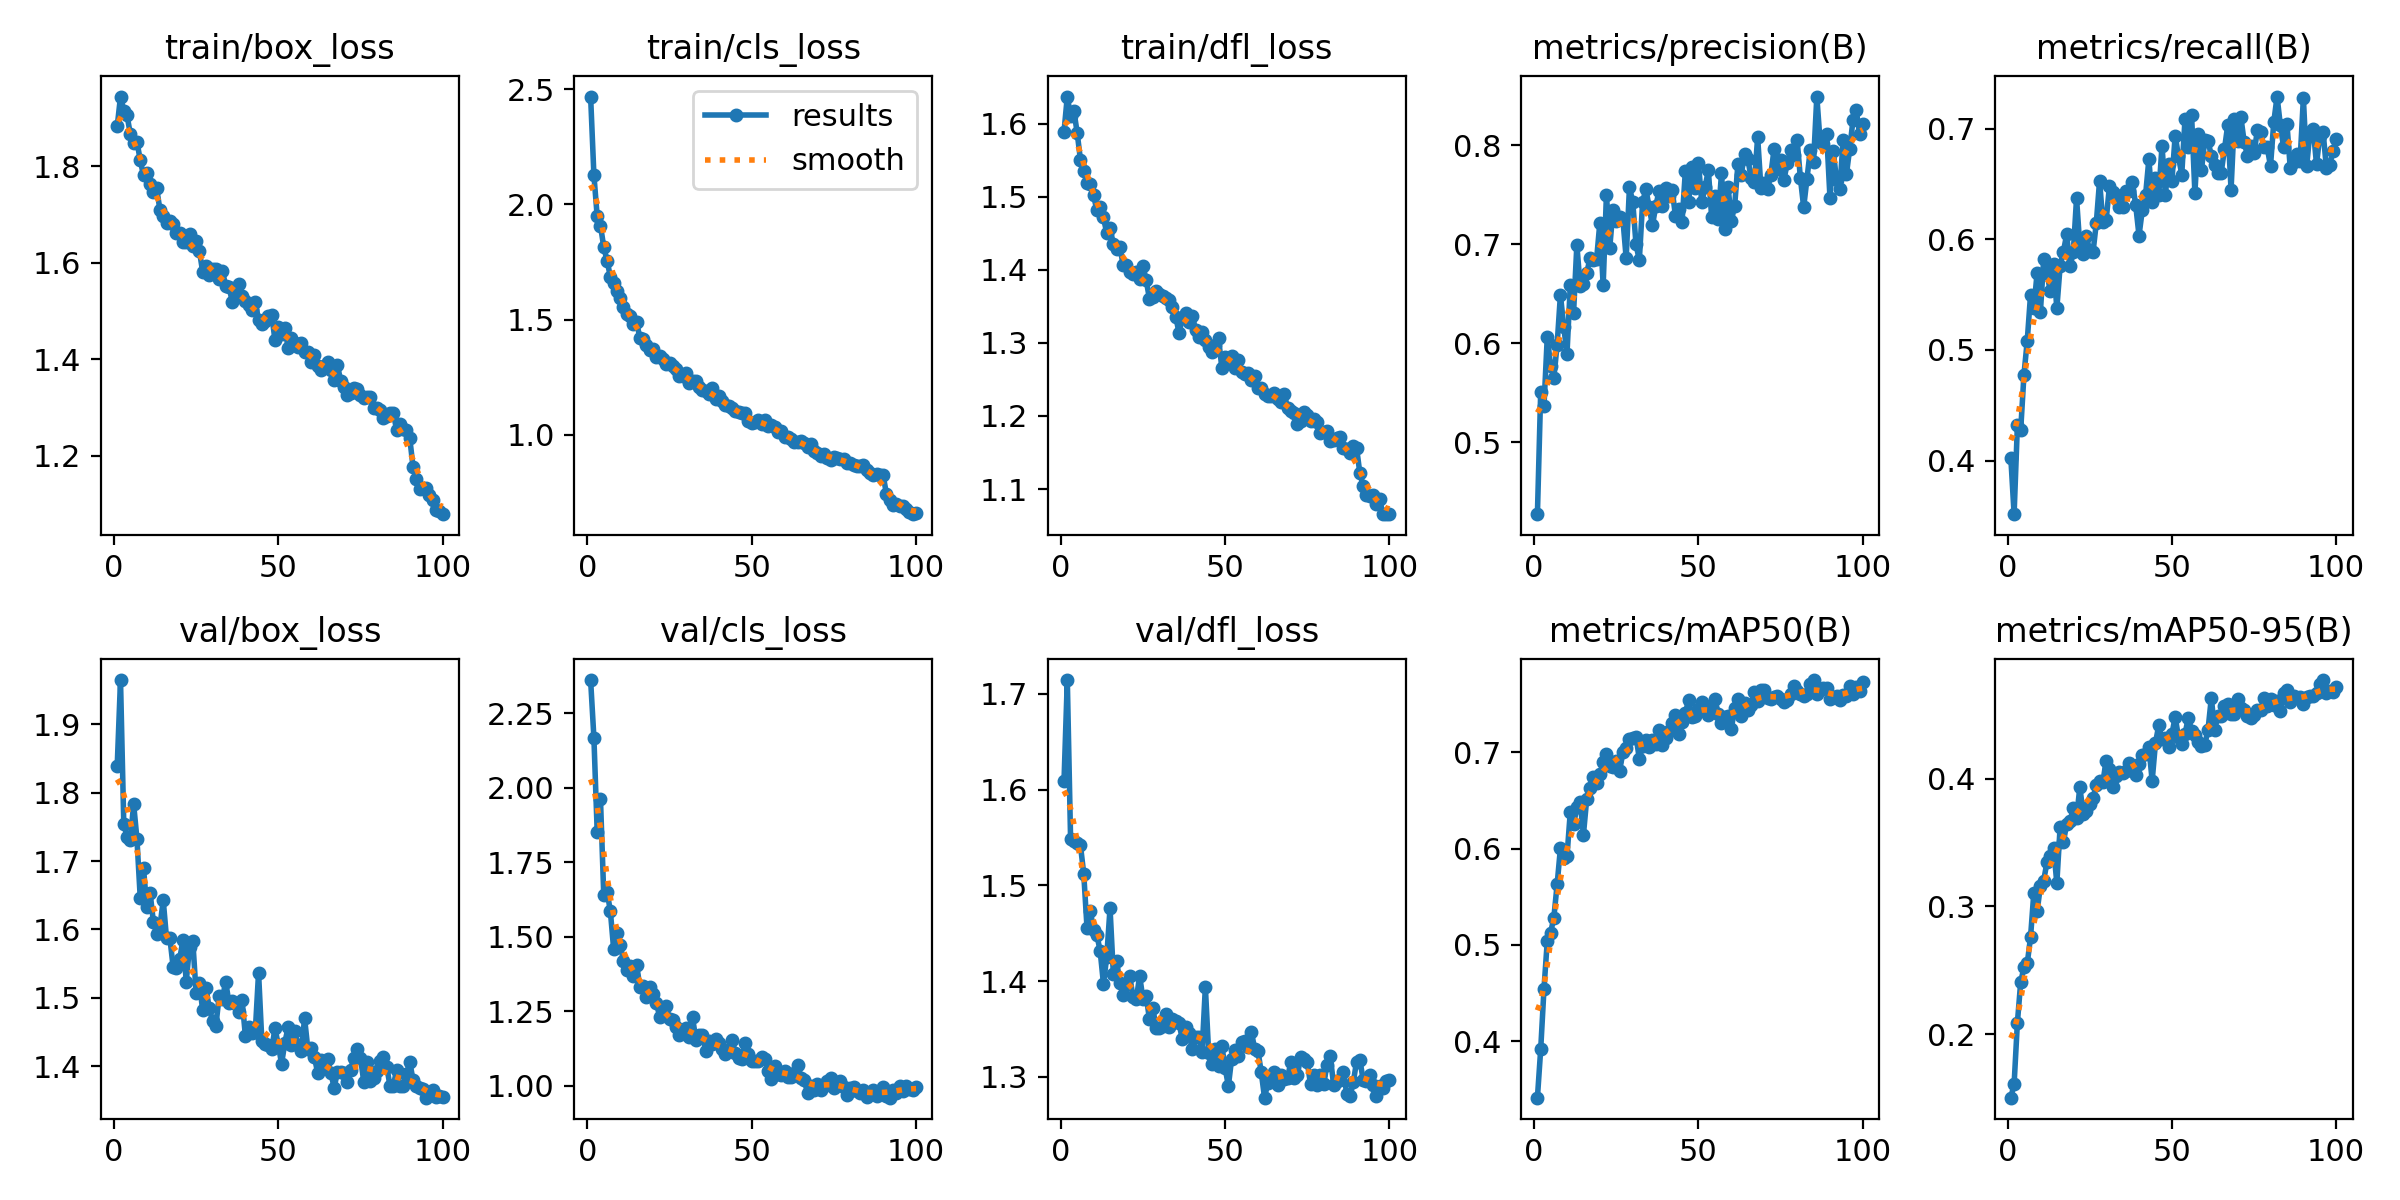

In [7]:
Image("/kaggle/working/runs/detect/train/results.png",width=600)


image 1/1 /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/valid/images/155_jpg.rf.62cb9d488733d4e0ae9970df142e1646.jpg: 384x640 1 pothole, 45.5ms
Speed: 2.1ms preprocess, 45.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


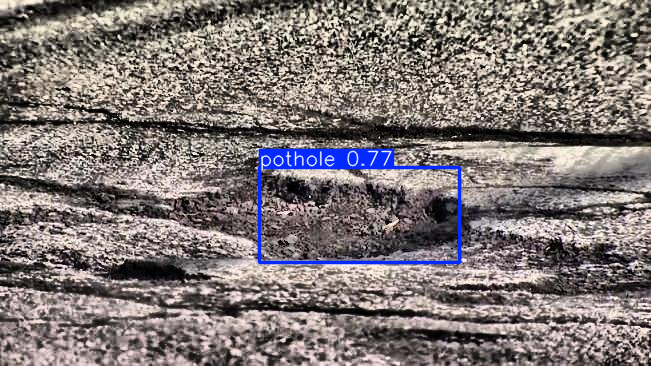

In [8]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

results = model("/kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/valid/images/155_jpg.rf.62cb9d488733d4e0ae9970df142e1646.jpg")

results[0].show()

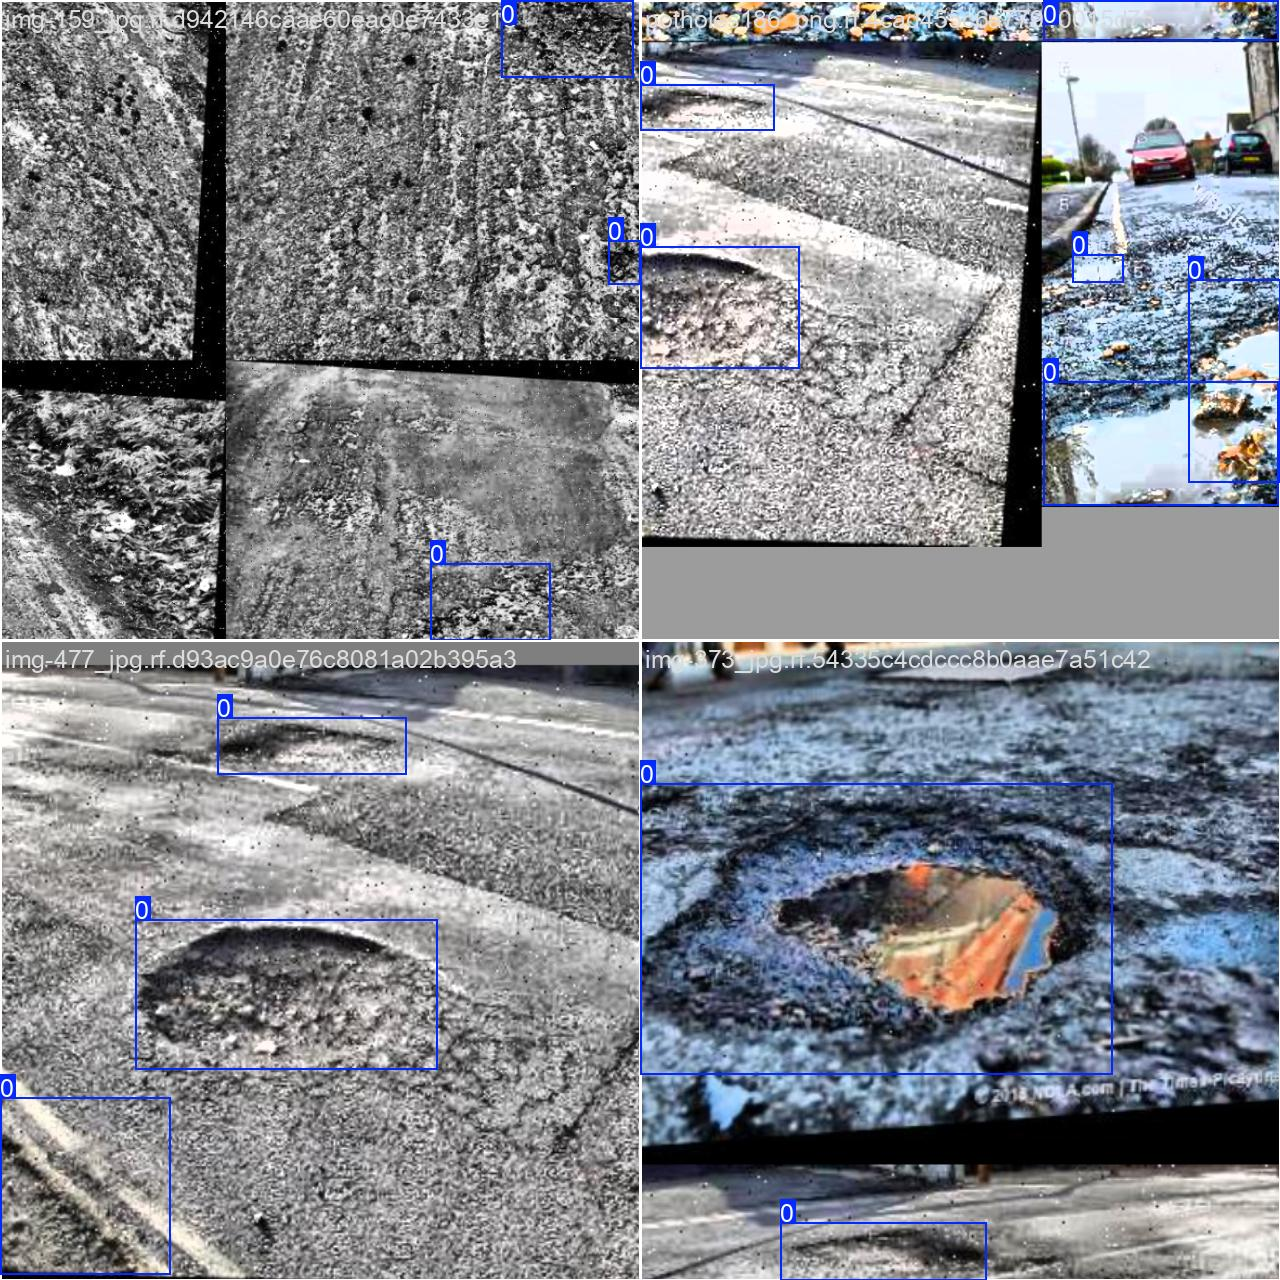

In [9]:
Image("/kaggle/working/runs/detect/train/train_batch0.jpg",width=600)

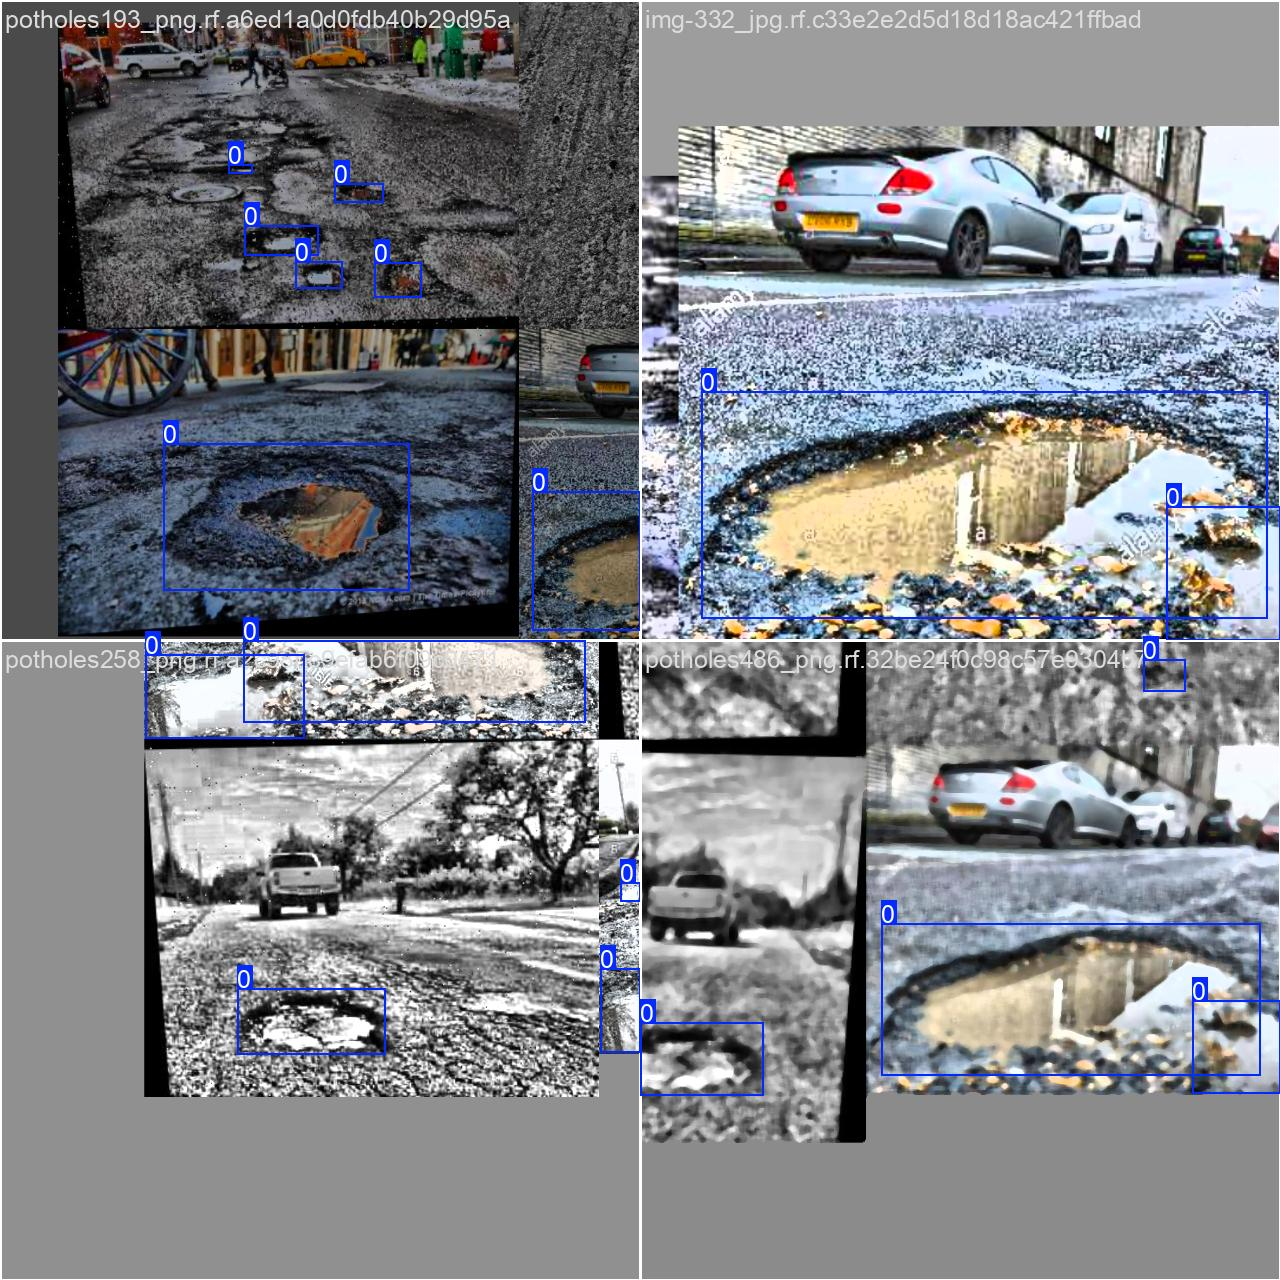

In [10]:
Image("/kaggle/working/runs/detect/train/train_batch1.jpg",width=600)

In [11]:
model.save('/kaggle/working/pothole_detector.pt')

In [14]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source=/kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/test/images, save=True

WARNING ⚠️ argument 'source=/kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/test/images,' does not require trailing comma ',', updating to 'source=/kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/test/images'.
Ultralytics 8.3.92 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/73 /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/test/images/146_jpg.rf.0338fc3f1b246e5f34d069dd932e95c0.jpg: 384x640 1 pothole, 44.8ms
image 2/73 /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/test/images/149_jpg.rf.aa1c48c8c93d9998b363e1fbc7f0ea1a.jpg: 448x640 3 potholes, 42.8ms
image 3/73 /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/test/images/154_jpg.rf.78348cafe3b0de9301515b4822da261e.jpg: 416x640 2 potholes, 40.5ms
image 4/73 /kaggle/input/pothole-detectionss/Pothole_Detection.v1i.yolov11/test/images/174_png.rf.64b0769

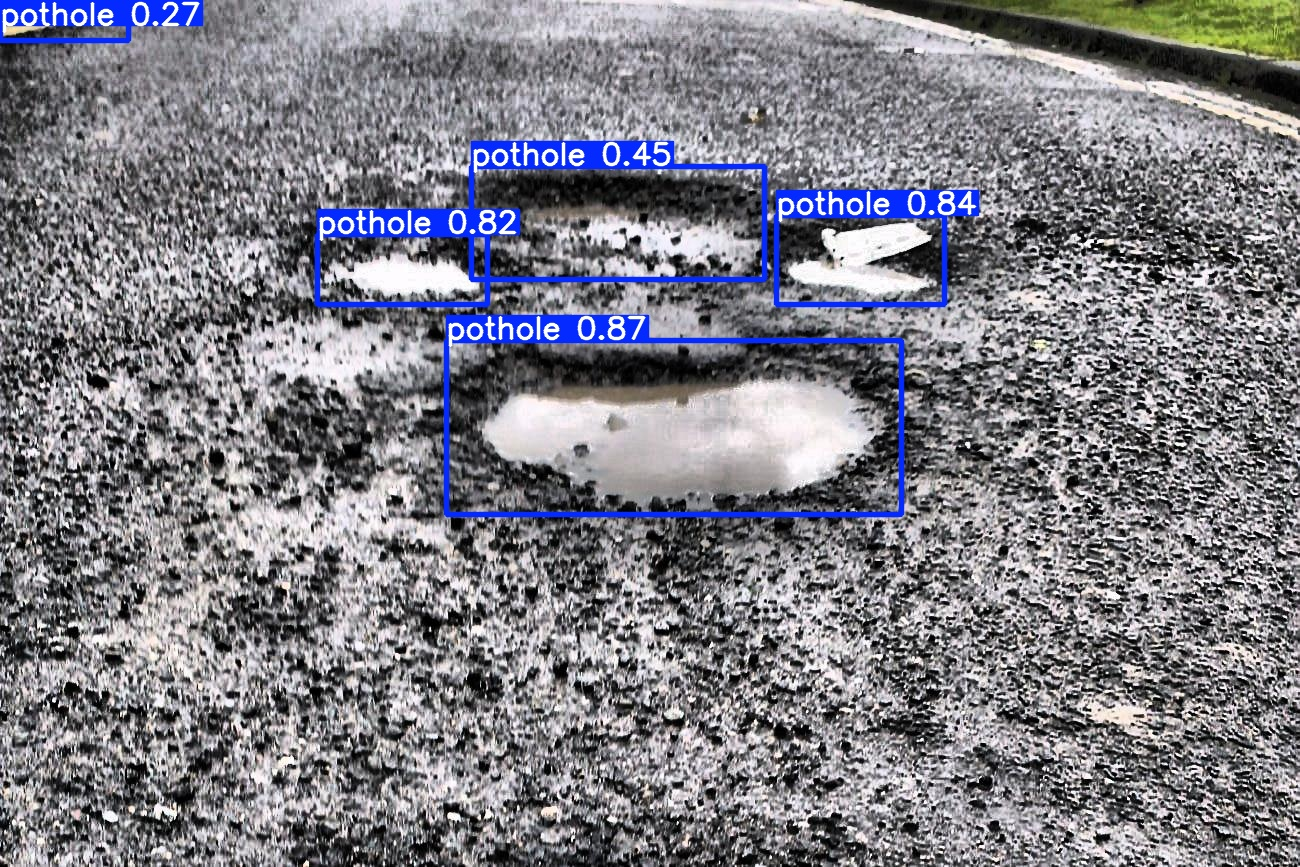

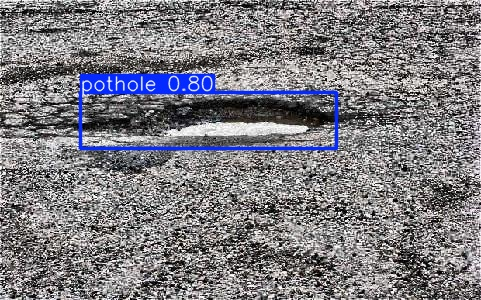

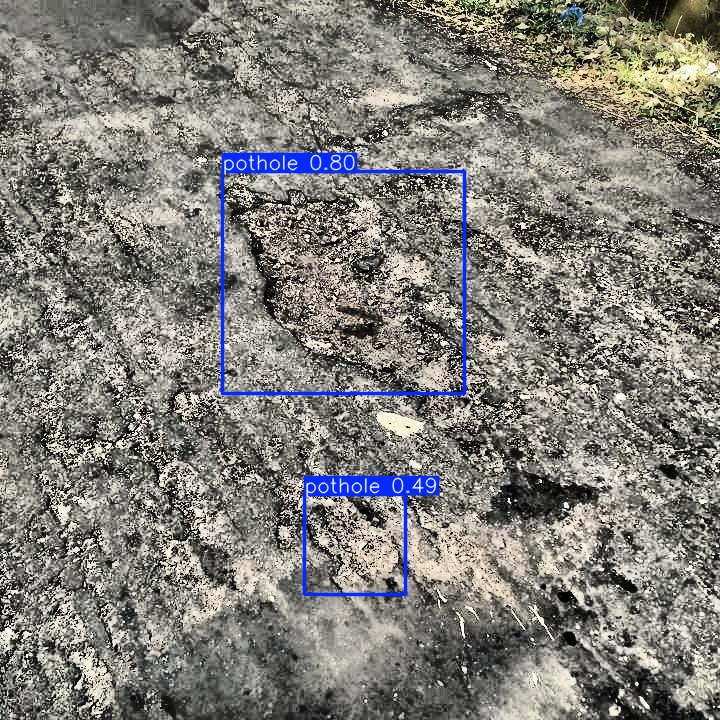

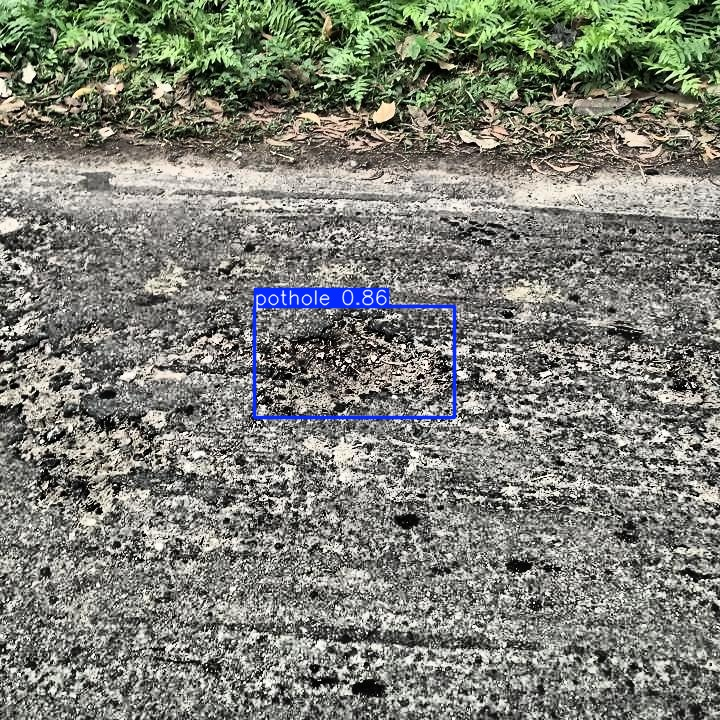

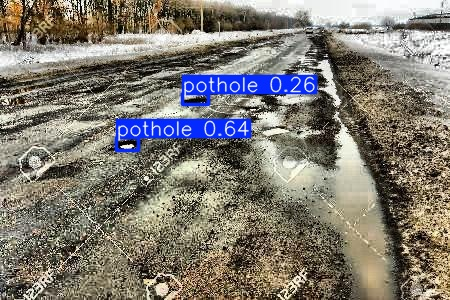

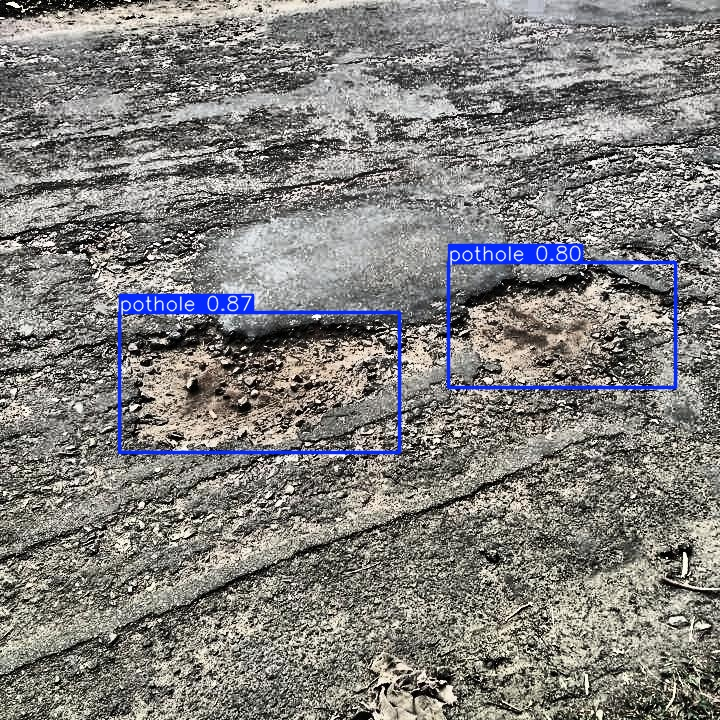

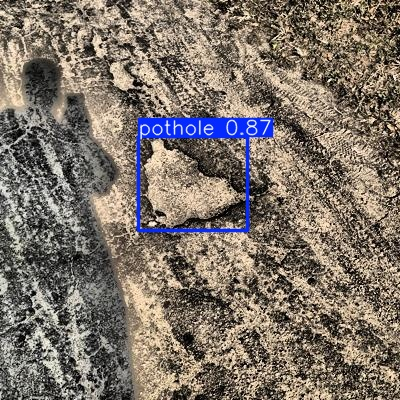

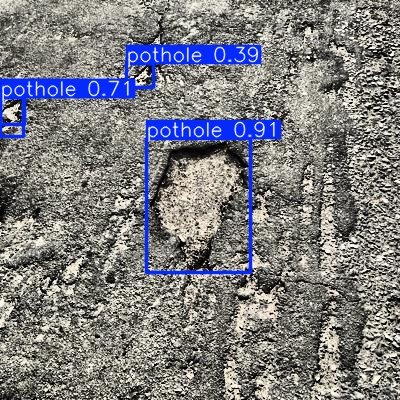

In [18]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[10:18]:
    display(IPyImage(filename=img, width=600))
    print("\n")